# Problem
Solve the ODE bellow:
$$
\frac{dT}{dt} = 0.2\times(20 - T)
$$
with initial condition $T(0) = 5$.

## 1. Euler's Method
<img src='https://raw.githubusercontent.com/HuangJiaLian/DataBase0/master/uPic/cABVGz.png' width=50%>

In [3]:
import matplotlib.pyplot as plt

In [4]:
def euler(f, x0, delta_t, times):
    # ts for recording time list 
    ts = []
    ts.append(0)
    solution = []
    solution.append(x0)
    for i in range(times):
        # Step 2
        rate = f(solution[i])
        # Step 3: pretend the rate is constant for delta_t
        nx = solution[i] + rate*delta_t
        
        # Record time steps and solutions  
        solution.append(nx)
        ts.append((i+1)*delta_t)

    return ts, solution

In [5]:
def f(T):
    return  0.2*(20-T)

In [6]:
ts, solution1 = euler(f, x0=30, delta_t=0.1, times=400)
_, solution2 = euler(f, x0=20, delta_t=0.1, times=400)
_, solution3 = euler(f, x0=10, delta_t=0.1, times=400)

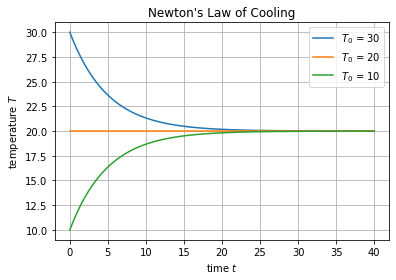

In [7]:
plt.xlabel('time $t$')
plt.ylabel('temperature $T$')
plt.title('Newton\'s Law of Cooling')
plt.grid(True)
plt.plot(ts, solution1, label='$T_0$ = 30')
plt.plot(ts, solution2, label='$T_0$ = 20')
plt.plot(ts, solution3, label='$T_0$ = 10')
plt.legend()

### Another way to think about Euler's Method
$$
\frac{dT}{dt} = 0.2\times(20 - T)
$$

$$
\frac{dT_t}{dt} = 0.2\times(20 - T_t)
$$

$$
dT_t = 0.2\times(20 - T_t)dt
$$

Then,

$$
T_{(t+\Delta t)} - T_{t} = 0.2\times(20 - T_t)\Delta t
$$

$$
T_{(t+\Delta t)}  = T_{t} + 0.2\times(20 - T_t)\Delta t
$$

where $0.2\times(20 - T_t)$ is the average slop.

# 2. Runge-Kutta Methods
Use more accurate way to calculate averge slop.
<img src='https://raw.githubusercontent.com/HuangJiaLian/DataBase1/master/20200608122835.png' width='50%'>

In [8]:
def runge_kutta(f, x0, delta_t, times):
    # ts for recording time list 
    ts = []
    ts.append(0)
    solution = []
    solution.append(x0)
    for i in range(times):
        # Step 2
        k1 = f(solution[i])
        k2 = f(solution[i] + delta_t/2)
        k3 = f(solution[i] + delta_t/2)
        k4 = f(solution[i] + delta_t)
        rate = (k1 + 2*k2 + 2*k3 + k4)/6
        # Step 3: pretend the rate is constant for delta_t
        nx = solution[i] + rate*delta_t
        
        # Record time steps and solutions  
        solution.append(nx)
        ts.append((i+1)*delta_t)

    return ts, solution

In [14]:
ts, solution1_rk = runge_kutta(f, x0=30, delta_t=0.1, times=400)

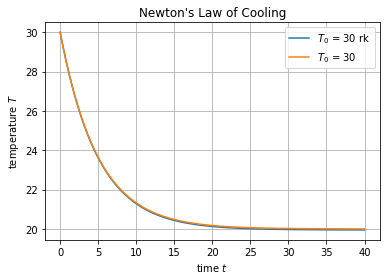

In [17]:
plt.xlabel('time $t$')
plt.ylabel('temperature $T$')
plt.title('Newton\'s Law of Cooling')
plt.grid(True)
plt.plot(ts, solution1_rk, label='$T_0$ = 30 rk')
plt.plot(ts, solution1, label='$T_0$ = 30')
plt.legend()